# Exploratory Data Analysis

## Set Up

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # type: ignore
import numpy as np
import sys
import os

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import combine_files_to_dfs

# Create combined dataframe from ghcn_clean files
dfs = combine_files_to_dfs("../data/ghcn_clean")
CA_stations_clean = pd.concat(dfs, ignore_index=True) # type: ignore

# add a datetime column for summary statistics
CA_stations_clean['datetime'] = pd.to_datetime(CA_stations_clean[['Year', 'Month', 'Day', 'Hour']])

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv


In [3]:
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,Year,Month,Day,Hour,Temperature,datetime
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,0,5.9,2003-01-01 00:00:00
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,1,8.1,2003-01-01 01:00:00
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,2,10.0,2003-01-01 02:00:00
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,3,11.3,2003-01-01 03:00:00
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,4,12.3,2003-01-01 04:00:00


# Summary Statistics

### Hourly Scale

In [4]:
by_hour = CA_stations_clean.groupby(['datetime'])['Temperature']
hourly_scale = by_hour.agg(['mean', 'median', 'std', 'min', 'max','count']).reset_index()
hourly_scale.columns = ['datetime', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature','temperature_count']

hourly_scale.head()

,datetime,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01-01 00:00:00,6.372368,5.9,2.809963,-1.0,17.0,76
1,2003-01-01 01:00:00,8.120513,8.1,4.102117,-8.3,19.0,78
2,2003-01-01 02:00:00,10.019231,10.0,3.761323,-3.3,20.0,78
3,2003-01-01 03:00:00,11.285897,11.3,4.564650,-8.0,26.0,78
4,2003-01-01 04:00:00,12.326923,12.3,3.772824,2.0,23.0,78


### Daily Scale

In [5]:
by_day = CA_stations_clean.groupby(['datetime'])['Temperature']
daily_scale = by_day.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
daily_scale.columns = ['date', 'mean_temperature', 'median_temperature', 'std_temperature', 
                       'min_temperature', 'max_temperature', 'temperature_count']

# calculate daily range
daily_scale['temperature_range'] = daily_scale['max_temperature'] - daily_scale['min_temperature']

daily_scale.head()

,date,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count,temperature_range
0,2003-01-01 00:00:00,6.372368,5.9,2.809963,-1.0,17.0,76,18.0
1,2003-01-01 01:00:00,8.120513,8.1,4.102117,-8.3,19.0,78,27.3
2,2003-01-01 02:00:00,10.019231,10.0,3.761323,-3.3,20.0,78,23.3
3,2003-01-01 03:00:00,11.285897,11.3,4.564650,-8.0,26.0,78,34.0
4,2003-01-01 04:00:00,12.326923,12.3,3.772824,2.0,23.0,78,21.0


### Monthly Scale

In [6]:
CA_stations_clean['year_month'] = CA_stations_clean['datetime'].dt.to_period('M')
by_month = CA_stations_clean.groupby(['year_month'])['Temperature']
monthly_scale = by_month.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
monthly_scale.columns = ['year_month', 'mean_temperature', 'median_temperature', 'std_temperature', 
                         'min_temperature', 'max_temperature', 'temperature_count']

monthly_scale.head()

,year_month,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01,11.306946,11.0,4.575528,-8.3,34.0,58003
1,2003-02,9.784497,10.3,4.871827,-8.5,28.0,52221
2,2003-03,12.365883,12.1,5.095617,-8.5,34.0,58021
3,2003-04,11.737615,11.9,4.719056,-8.3,33.0,55997
4,2003-05,16.133957,15.1,6.057141,-6.1,39.4,57979


### Seasonal Scale

In [9]:
from notebook_utils.exploratory import assign_season

CA_stations_clean['Season'] = CA_stations_clean['datetime'].dt.month.apply(assign_season)

by_season = CA_stations_clean.groupby(['Year', 'Season'])['Temperature']

seasonal_scale = by_season.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
seasonal_scale.columns = ['Year', 'Season', 'mean_temperature', 'median_temperature', 'std_temperature', 
                          'min_temperature', 'max_temperature', 'temperature_count']

seasonal_scale.head()

,Year,Season,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,Fall,16.039844,15.6,7.070835,-8.5,39.5,170282
1,2003,Spring,13.431530,13.0,5.670600,-8.5,39.4,171997
2,2003,Summer,21.015894,20.0,6.294406,-2.0,39.5,171293
3,2003,Winter,10.149614,10.4,4.753834,-8.5,34.0,167583
4,2004,Fall,15.435528,15.0,7.323537,-8.6,39.4,117927


### Yearly Scale

In [11]:
by_year = CA_stations_clean.groupby(['Year'])['Temperature']
yearly_scale = by_year.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
yearly_scale.columns = ['Year', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature', 'temperature_count']

yearly_scale.head()

,Year,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,15.183413,14.3,7.203364,-8.5,39.5,681155
1,2004,15.330499,14.4,7.613601,-8.6,39.4,463428
2,2005,15.341625,14.5,7.454936,-8.6,39.6,514174
3,2006,15.337730,14.4,8.119349,-8.6,39.6,518766
4,2007,15.276815,14.6,8.000534,-8.6,39.6,548513


# Data Visualizations

In [16]:
cols = ['Station_ID', 'Station_name', 'Latitude', 'Longitude', 'datetime','Year', 'Month', 'Day', 'Hour', 'Temperature','Season']
CA_stations_clean = CA_stations_clean[cols]
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,datetime,Year,Month,Day,Hour,Temperature,Season
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 00:00:00,2003,1,1,0,5.9,Winter
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 01:00:00,2003,1,1,1,8.1,Winter
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 02:00:00,2003,1,1,2,10.0,Winter
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 03:00:00,2003,1,1,3,11.3,Winter
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 04:00:00,2003,1,1,4,12.3,Winter


### Histograms

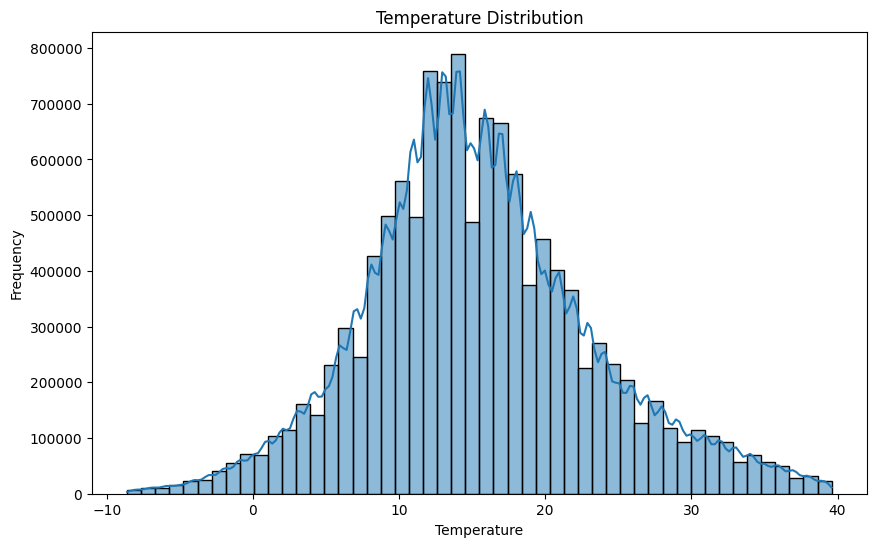

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(CA_stations_clean['Temperature'], bins=50, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### Boxplots

Hourly Temperature

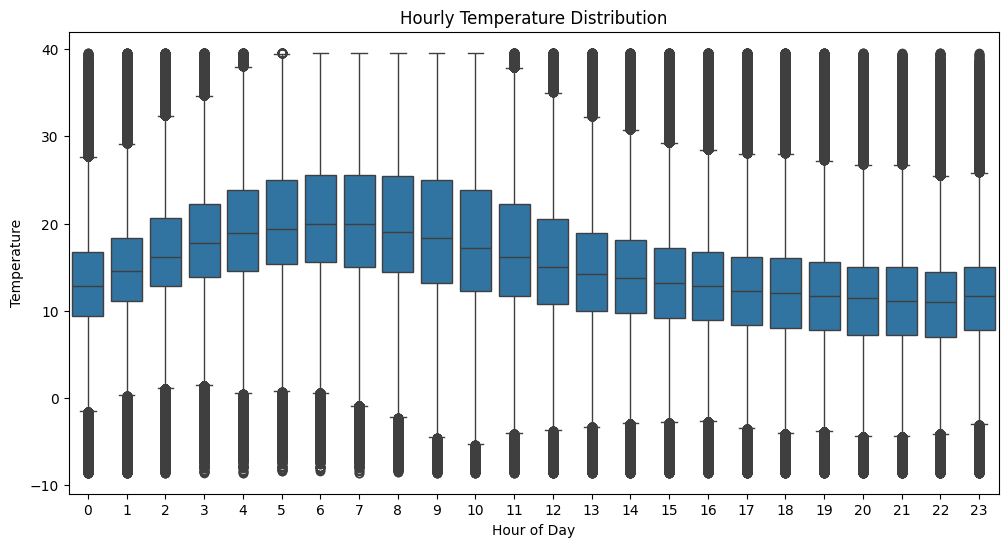

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Hour',y='Temperature', data=CA_stations_clean)
plt.title('Hourly Temperature Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.show()

Monthly Temperature

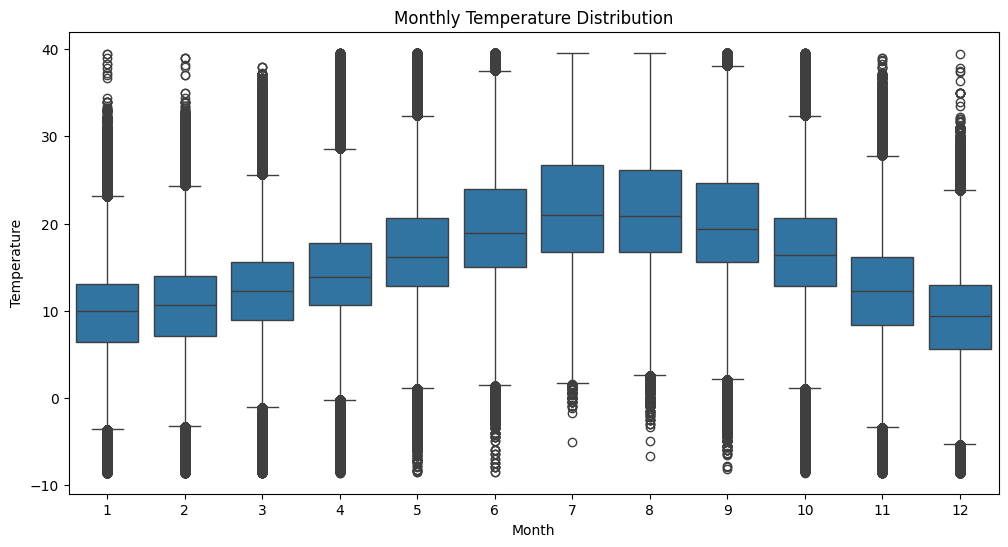

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=CA_stations_clean)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

Seasonal Temperature

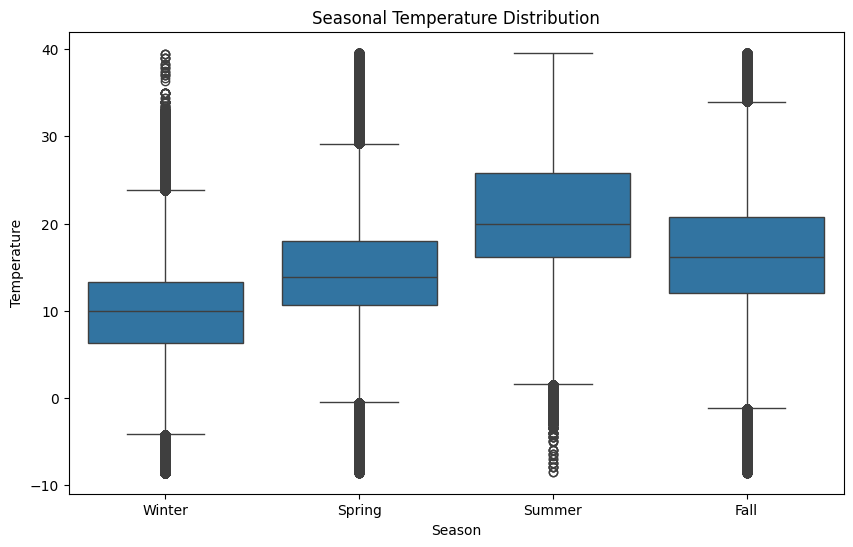

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Temperature', data=CA_stations_clean)
plt.title('Seasonal Temperature Distribution')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

### Time series plots

Daily Average Temperature

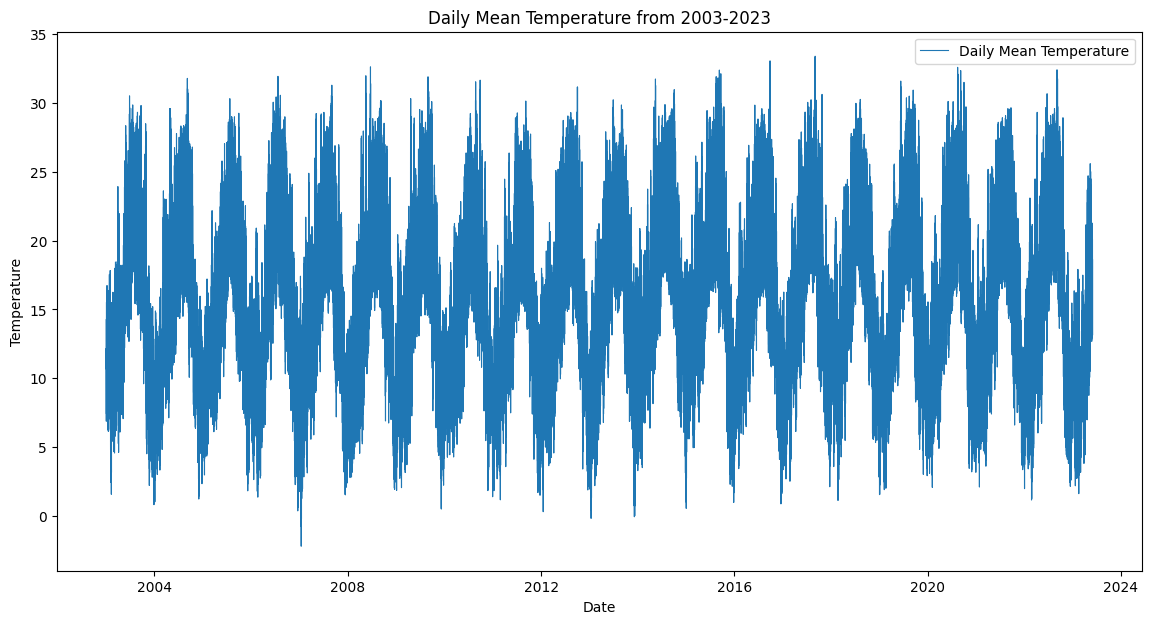

In [33]:
import matplotlib.dates as mdates

daily_scale['rolling_mean_temp'] = daily_scale['mean_temperature'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(daily_scale['date'], daily_scale['rolling_mean_temp'], label='Daily Mean Temperature',linewidth=0.8)
plt.title('Daily Mean Temperature from 2003-2023')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

Monthly Average Temperature

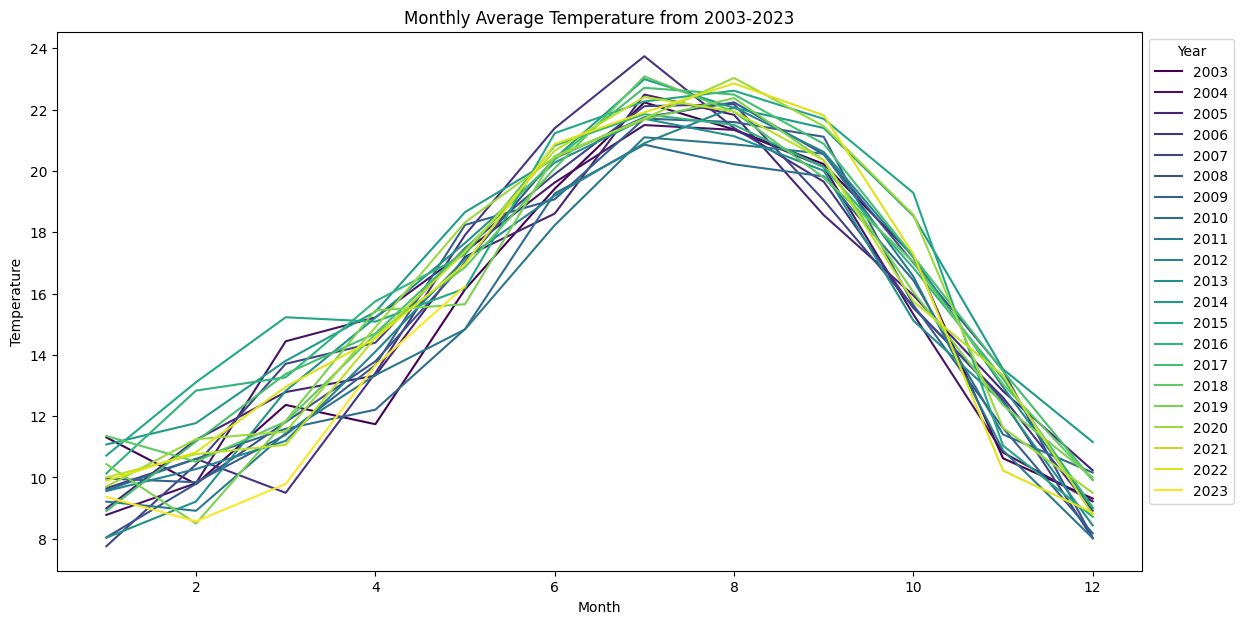

In [22]:
# Create new columns
monthly_scale = CA_stations_clean.groupby(['Year', 'Month'])['Temperature'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='mean', hue='Year', data=monthly_scale, palette='viridis',legend='full')
plt.title('Monthly Average Temperature from 2003-2023')
plt.xlabel('Month')
plt.ylabel('Temperature')

# move legend
plt.legend(title='Year',bbox_to_anchor=(1,1),loc='upper left')
plt.show()

Yearly Average Temperature

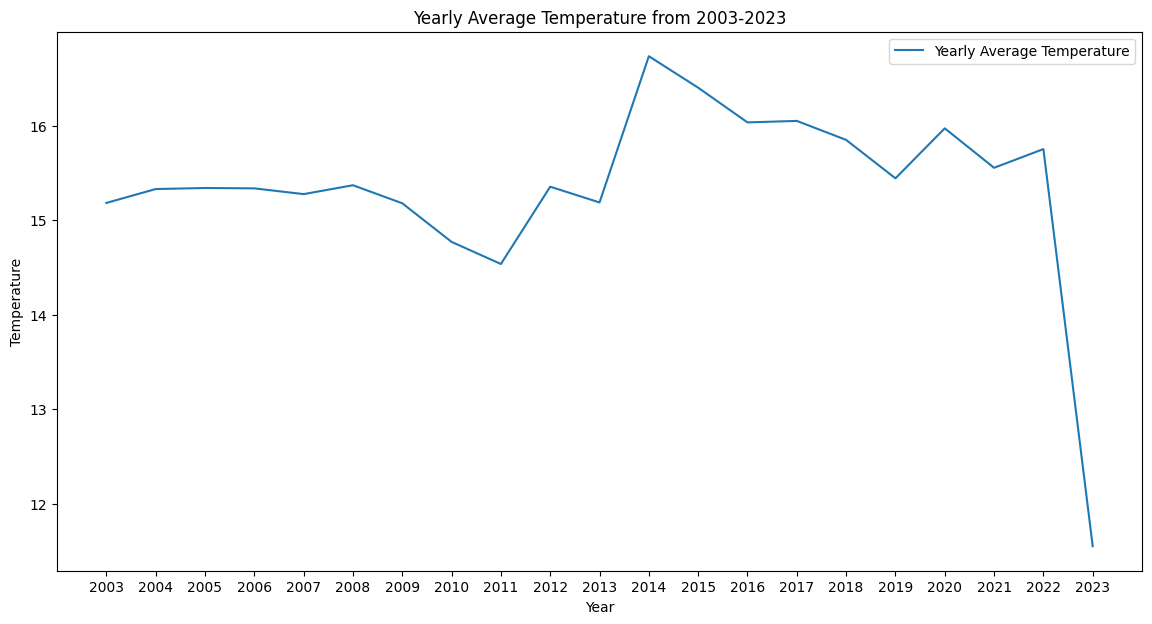

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_scale['Year'], yearly_scale['mean_temperature'], label='Yearly Average Temperature')
plt.title('Yearly Average Temperature from 2003-2023')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(yearly_scale['Year'].astype(int))
plt.legend()
plt.show()

## Create plots for different stations, climates and counties